# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 73037.51 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 97290.23 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 116708.32 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 130845.20 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 139879.09 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 147239.49 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 75663.98 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 109037.44 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 128505.67 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 139180.84 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 146060.57 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 152353.19 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.03 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.00 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.16 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.66 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.16 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.96 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.83 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.93 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.07 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.18 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.30 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.44 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.08 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.10 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.76 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.01 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.72 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.43 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.51 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.57 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.58 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.89 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.35 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.72 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.39 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.55 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.02 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.17 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.49 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 16.83 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.02 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.02 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.08 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.71 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 42.82 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 42.22 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.04 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.61 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.38 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.85 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.49 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.53 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.96 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.84 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.12 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.18 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.45 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.71 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.72 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.62 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.60 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.06 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.22 examples/s]

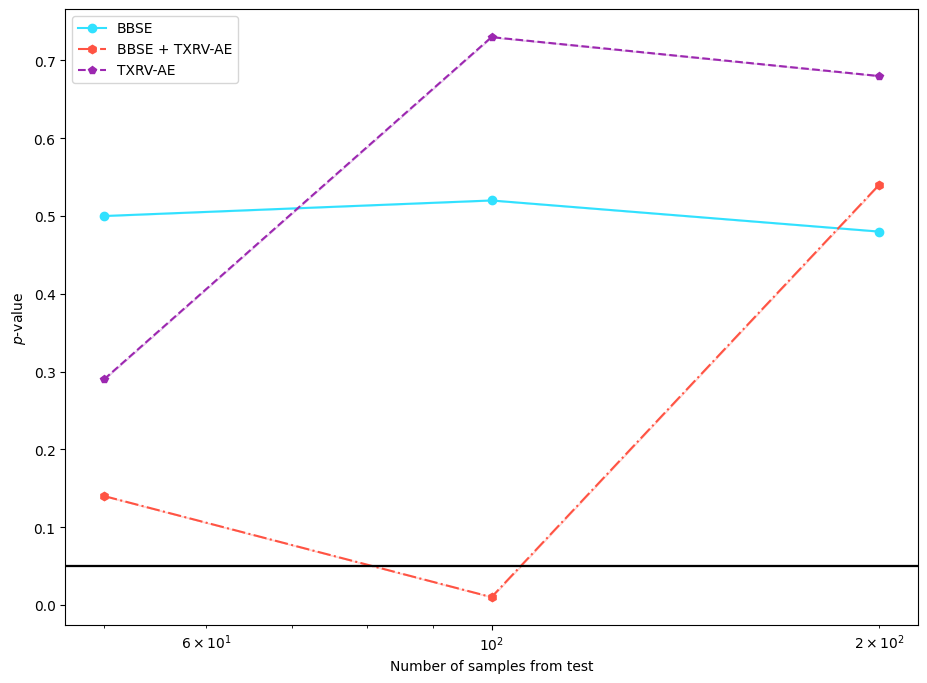

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.47 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.95 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.46 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.35 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.26 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.16 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.92 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.78 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.07 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.77 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 36.76 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.41 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.48 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.47 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.33 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.17 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.01 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.68 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.29 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.88 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.45 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.41 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.14 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.57 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.98 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.05 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.97 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.68 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.91 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.40 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.56 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.57 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.31 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.58 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.08 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.33 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.41 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.88 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.49 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.94 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.09 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.13 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.76 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.56 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.06 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.99 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.20 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.25 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.14 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.90 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.07 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.15 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.98 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.67 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.07 examples/s]

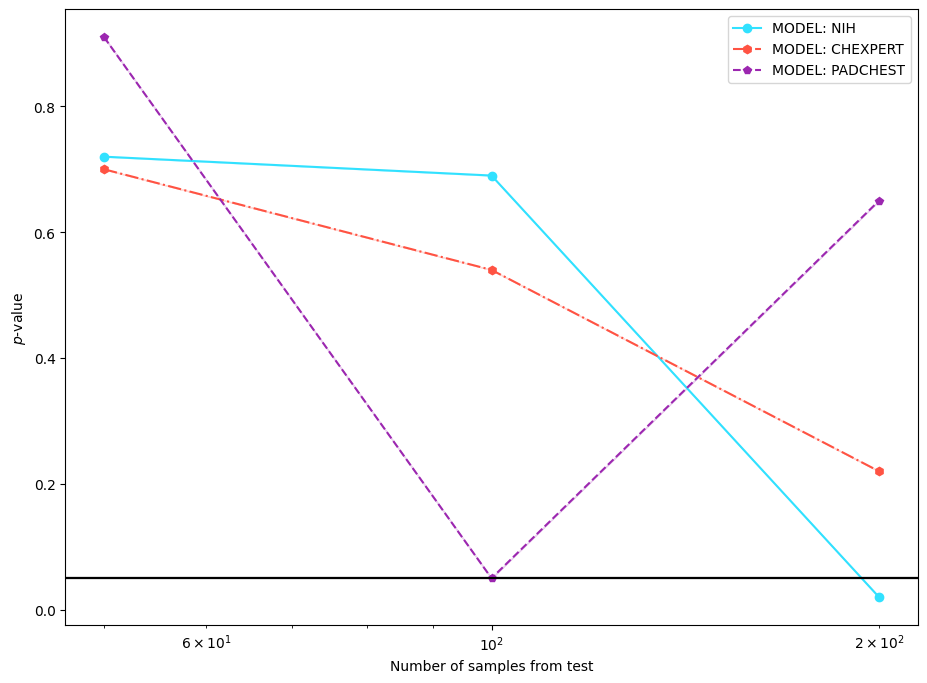

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56343.15 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76498.18 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86908.97 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89747.52 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96811.52 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 101935.83 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51084.14 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71366.54 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84672.63 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 93052.14 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98741.95 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 102056.02 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.25 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.81 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.61 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.26 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.87 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.83 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.80 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.43 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.47 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.28 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.00 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.67 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.74 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.42 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.28 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.67 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.00 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52246.75 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72522.70 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 81920.49 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89313.28 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101297.59 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111717.07 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50024.64 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73486.41 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86139.27 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 91720.61 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 99336.59 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 102761.99 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 16.93 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.30 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.25 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.66 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.50 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.69 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.97 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.79 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.82 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.51 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.28 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.70 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.48 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.30 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.80 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.07 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.07 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.69 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51690.52 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74472.05 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86732.74 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96243.88 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98902.45 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 100213.53 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48642.34 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71754.37 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84958.53 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92159.71 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96909.73 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 102856.72 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.42 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.18 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.62 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.29 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.82 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.16 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.37 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.26 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.06 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.76 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.66 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.18 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.09 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.49 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.33 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.57 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.54 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49646.31 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75249.68 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 87436.39 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94344.65 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 91723.59 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 100034.32 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:02, 45618.81 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 66433.89 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 80674.78 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89841.65 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96085.07 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 99948.21 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.71 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.42 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.35 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.83 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.10 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.51 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.95 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.97 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.78 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.48 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.25 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.03 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.67 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.52 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.84 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.16 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.01 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.36 examples/s]

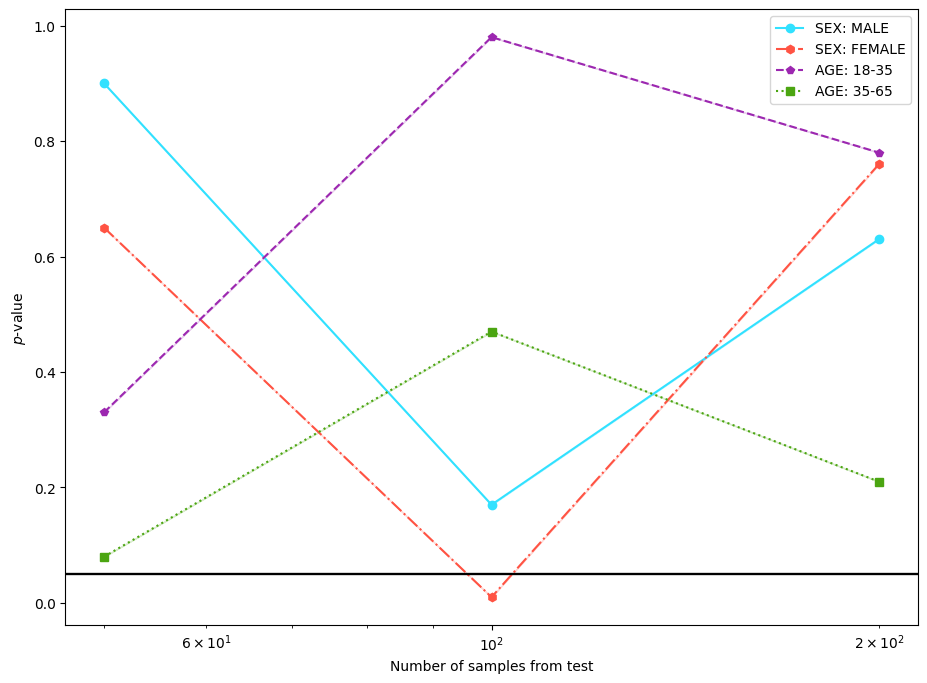

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.43 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.91 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.02 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.91 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.07 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.17 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.95 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.74 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.72 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.25 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.57 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.53 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.20 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.04 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.26 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.22 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.92 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.21 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.14 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.16 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.06 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.05 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.11 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.43 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.33 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.34 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.09 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.91 examples/s]

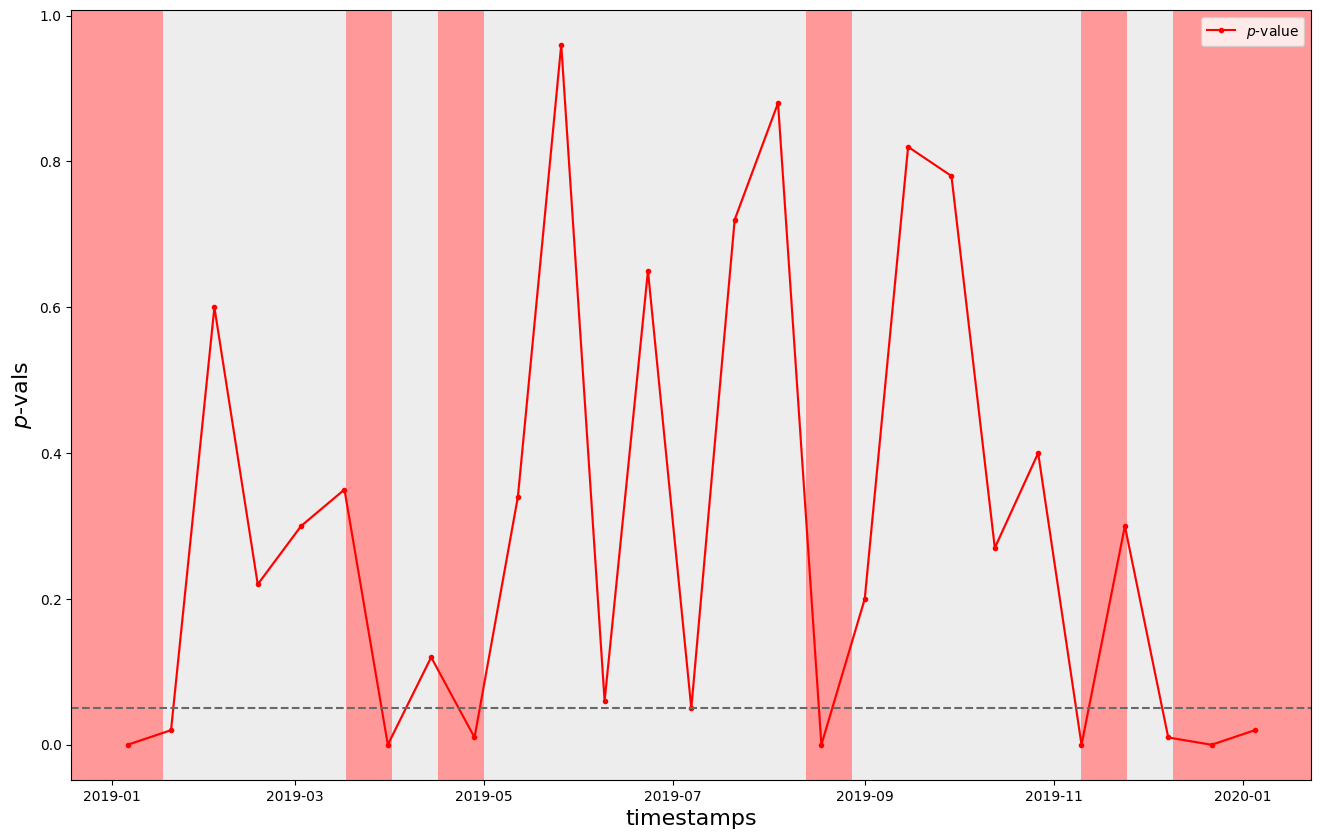

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)